Members :  
    Arvind Pandit (211022001)   
    Girish Kumar Gupta (211022002)  
    Sumanth S Raikar (211022005) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
import random
from scipy import integrate
from scipy.stats import truncnorm
from scipy import stats
from IPython.display import display, Math, Latex

#Problem 1#

## Sampling from different probability distribution and verification by plotting histogram for different no of samples.

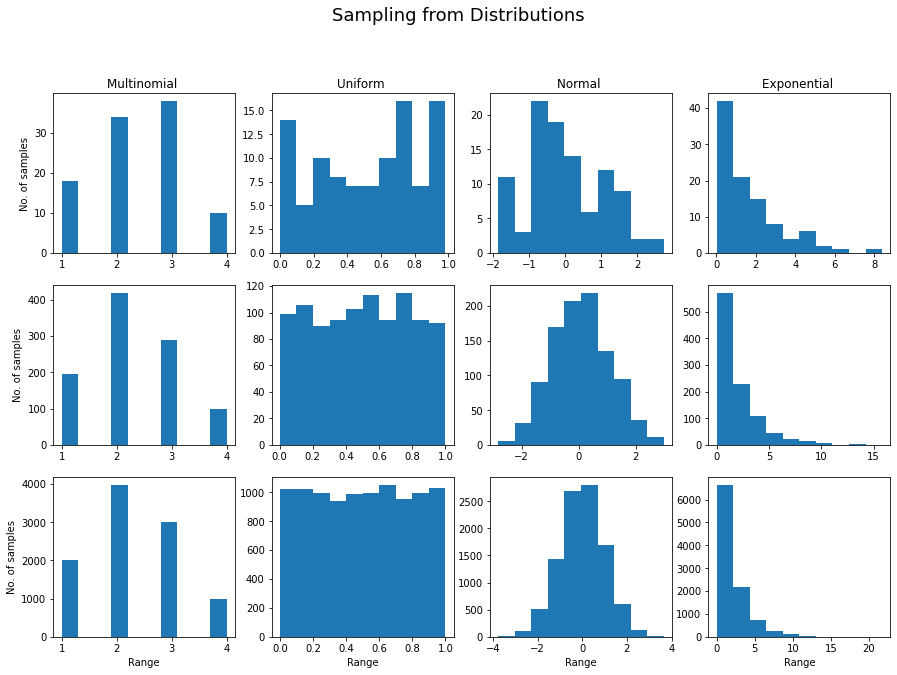

In [ ]:
n = [100, 1000, 10000]                                          # No. of samples 

k = [0, 1, 2]
fig, axs = plt.subplots(3,4, figsize=(15,10))
fig.suptitle('Sampling from Distributions' ,fontsize=18, y=1)
# plt.tight_layout()
for i, in1 in zip(n, k):
  ##############################################################################
  ##########     Sampling from Multinomial distribution          ###############
  x1 = np.random.choice(np.arange(1,5), i, p=[0.2, 0.4, 0.3, 0.1])
  axs[in1,0].hist(x1)
  axs[0,0].set_title('Multinomial ')
  axs[2,0].set_xlabel('Range')
  axs[in1,0].set_ylabel('No. of samples')

  ##############################################################################
  ##########      Sampling from Uniform distribution             ###############
  x2 = np.random.uniform(0, 1, i)
  axs[in1,1].hist(x2)
  axs[0,1].set_title('Uniform ')  
  axs[2,1].set_xlabel('Range')

  ##############################################################################
  ##########      Sampling from Normal distribution             ################
  x3 = np.random.normal(0, 1, i)
  axs[in1,2].hist(x3)
  axs[0,2].set_title('Normal ')
  axs[2,2].set_xlabel('Range')

  ##############################################################################
  ##########      Sampling from Exponential distribution         ###############
  x4 = np.random.exponential(2,i)
  axs[in1,3].hist(x4)
  axs[0,3].set_title('Exponential ')
  axs[2,3].set_xlabel('Range')

plt.show()

#Problem 2#
##Inverse Sampling Method##
If U ~ Uniform(0,1) then $X=F^{-1}(U)$. Then $X$ is random variable with CDF F( ) \\
$P(X\leq x) = P(F^{-1}(U) \leq x)$ then $P(U\leq F(x))=F(x)$

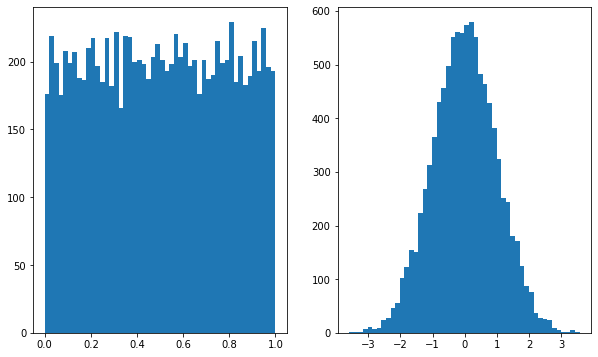

In [ ]:
X = np.random.uniform(0,1,10000)
fig = plt.figure(figsize=(10,6))
inv_cdf = stats.norm.ppf(X,loc=0,scale=1)
plt.subplot(1,2,1)
plt.hist(X,bins=50)
plt.subplot(1,2,2)
plt.hist(inv_cdf,bins=50)
plt.show()



## Generating samples from Normal disrtibution with the help of samples from Uniform distribution

## Box-Muller Transform

Using Inverse sampling $P(X< x) = \frac{1}{\sqrt{2\pi}}\int_{-∞}^{x} e^{y^2/2} dy$  doesn't give a closed form solution. Box-Muller solves this by generating two independent uniform random variables to get two normal distribution.

[Reference](https://www.google.com/url?sa=t&source=web&rct=j&url=https://www.math.nyu.edu/~goodman/teaching/MonteCarlo2005/notes/GaussianSampling.pdf&ved=2ahUKEwiIuaHK87v1AhU1T2wGHf3PA-wQFnoECBoQAQ&usg=AOvVaw2rrCTd0o9HwMpKw7-sgL0n)

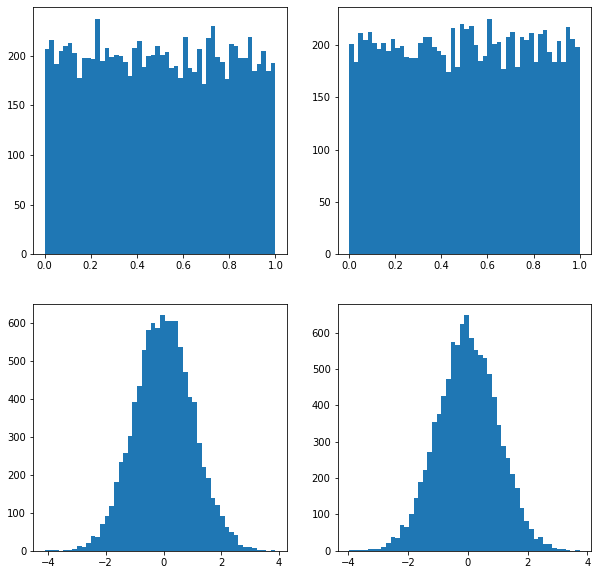

In [ ]:
from scipy import stats
fig = plt.figure(figsize=(10,10))
x1 = np.random.uniform(0,1,10000)
x2 = np.random.uniform(0,1,10000)
plt.subplot(2,2,1)
plt.hist(x1,bins=50)
plt.subplot(2,2,2)
plt.hist(x2,bins=50)

################################################################################
############         Box-Muller Transform           ############################        
z1 = np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*x2)
z2 = np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*x2)
plt.subplot(2,2,3)
plt.hist(z1,bins=50)
plt.subplot(2,2,4)
plt.hist(z2,bins=50)

plt.show()

# Problem 3#

##Finding the area of the functions using concept of probability.



1.   $f_1(x)\ = \ \sqrt{\sin{x}}$ 
2.   $f_2(x) \ = \ \sqrt{sin{x}}\ e^{-x^2}$



##  Plot $f_1(x)\ = \ \sqrt{\sin{x}}$ 

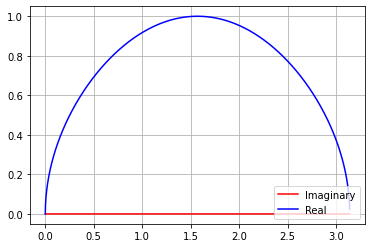

In [ ]:
t=np.arange(0,np.pi,1/1000)
wave_1 = np.zeros((len(t),1),dtype=complex)
for x in t:
    wave_1[int(x*1000)] = cmath.sqrt(np.sin(x))
plt.grid()
plt.plot(t,np.imag(wave_1),'r',label = 'Imaginary')
plt.plot(t,np.real(wave_1),'b',label = 'Real')
plt.legend(loc='lower right',ncol=1)
plt.show()


## Plot $f_2(x) \ = \ \sqrt{sin{x}}\ e^{-x^2}$

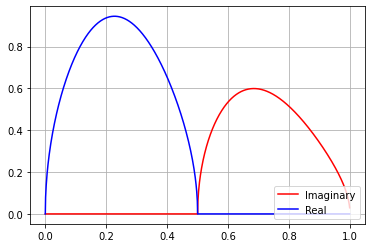

In [ ]:
t=np.arange(0,1,1/1000)
wave_2 = np.zeros((len(t),1),dtype=complex)
for x in t:
    wave_2[int(x*1000)] = cmath.sqrt(np.sin(2*np.pi*x))*np.exp(-np.power(x,2))
plt.grid()
plt.plot(t,np.imag(wave_2),'r',label = 'Imaginary')
plt.plot(t,np.real(wave_2),'b',label = 'Real')
plt.legend(loc='lower right',ncol=1)
plt.show()

## Estimating the Area of $f_1(x)$ and $f_2(x)$

To estimate an integral to function $f(x)$ i.e, $\int_a^b \ f(x)$. This can be writen as $E[g(x)] = \int_a^b \ \frac{f(x) p(x)}{p(x)}$  where $p(x)$ is distribution function and $g(x) = \frac{f(x)}{p(x)}$
 

If $p(x)$ is an Uniform Distribution then $p(x)=\frac{1}{b-a}$ for x in interval (a,b)
$E[g(x)] = \frac{b-a}{N}\sum_{i=1}^{N} g(x_i)$

In [ ]:
def f1(x):
    return cmath.sqrt(np.sin(x))

def f2(x):
    return cmath.sqrt(np.sin(x))*np.exp(-np.power(x,2))

def normal_sample_generator(mean,std,low,upper):
    return truncnorm(low,upper,loc=mean,scale=std)

def approx_integrator(a,b,n):
    U = np.random.uniform(a,b,n)
    N = normal_sample_generator(0,1/np.sqrt(2),0,np.pi)
    S = N.rvs(n)
    
    y_1 = [f1(u) for u in U]
    y_2 = [f2(u) for u in U]
    y_3 = [f1(u) for u in S]
    
    y_1_mean = np.sum(y_1)/n
    y_2_mean = np.sum(y_2)/n
    y_3_mean = np.sum(y_3)/n
    
    const = stats.norm.cdf((b*np.sqrt(2))) - stats.norm.cdf(a*np.sqrt(2))
    
    integrated_output_1 = (b-a)*y_1_mean
    integrated_output_2 = (b-a)*y_2_mean
    integrated_output_3 = const*np.sqrt(np.pi)*y_3_mean
    
    return integrated_output_1,integrated_output_2,integrated_output_3
    



In [ ]:
i_1,i_2,i_3 = approx_integrator(0,np.pi,10000)
#print(i_1,i_2,i_3)
print(f'Area of f1:{np.real(i_1)}')
print(f'Area of f2 using uniform distribution:{np.real(i_2)}')
print(f'Area of f2 using normal distribution:{np.real(i_3)}')

Area of f1:2.391031126298809
Area of f2 using uniform distribution:0.573513962340135
Area of f2 using normal distribution:0.5751221261350339


### Theoritical Values 

In [ ]:
################################################################################
############   Analytical calculation of area   ################################

x1 = lambda x: np.sqrt(np.sin(x))
x2 = lambda x: np.sqrt(np.sin(x))*np.exp(-np.power(x,2))
theoritical_area_1 = integrate.quad(x1,0,np.pi)
theoritical_area_2 = integrate.quad(x2,0,np.pi)

print(theoritical_area_1[0],theoritical_area_2[0])

2.396280469471185 0.574847391913489


# Problem 4#

## Simulate a Snake and ladder board game with 9 states
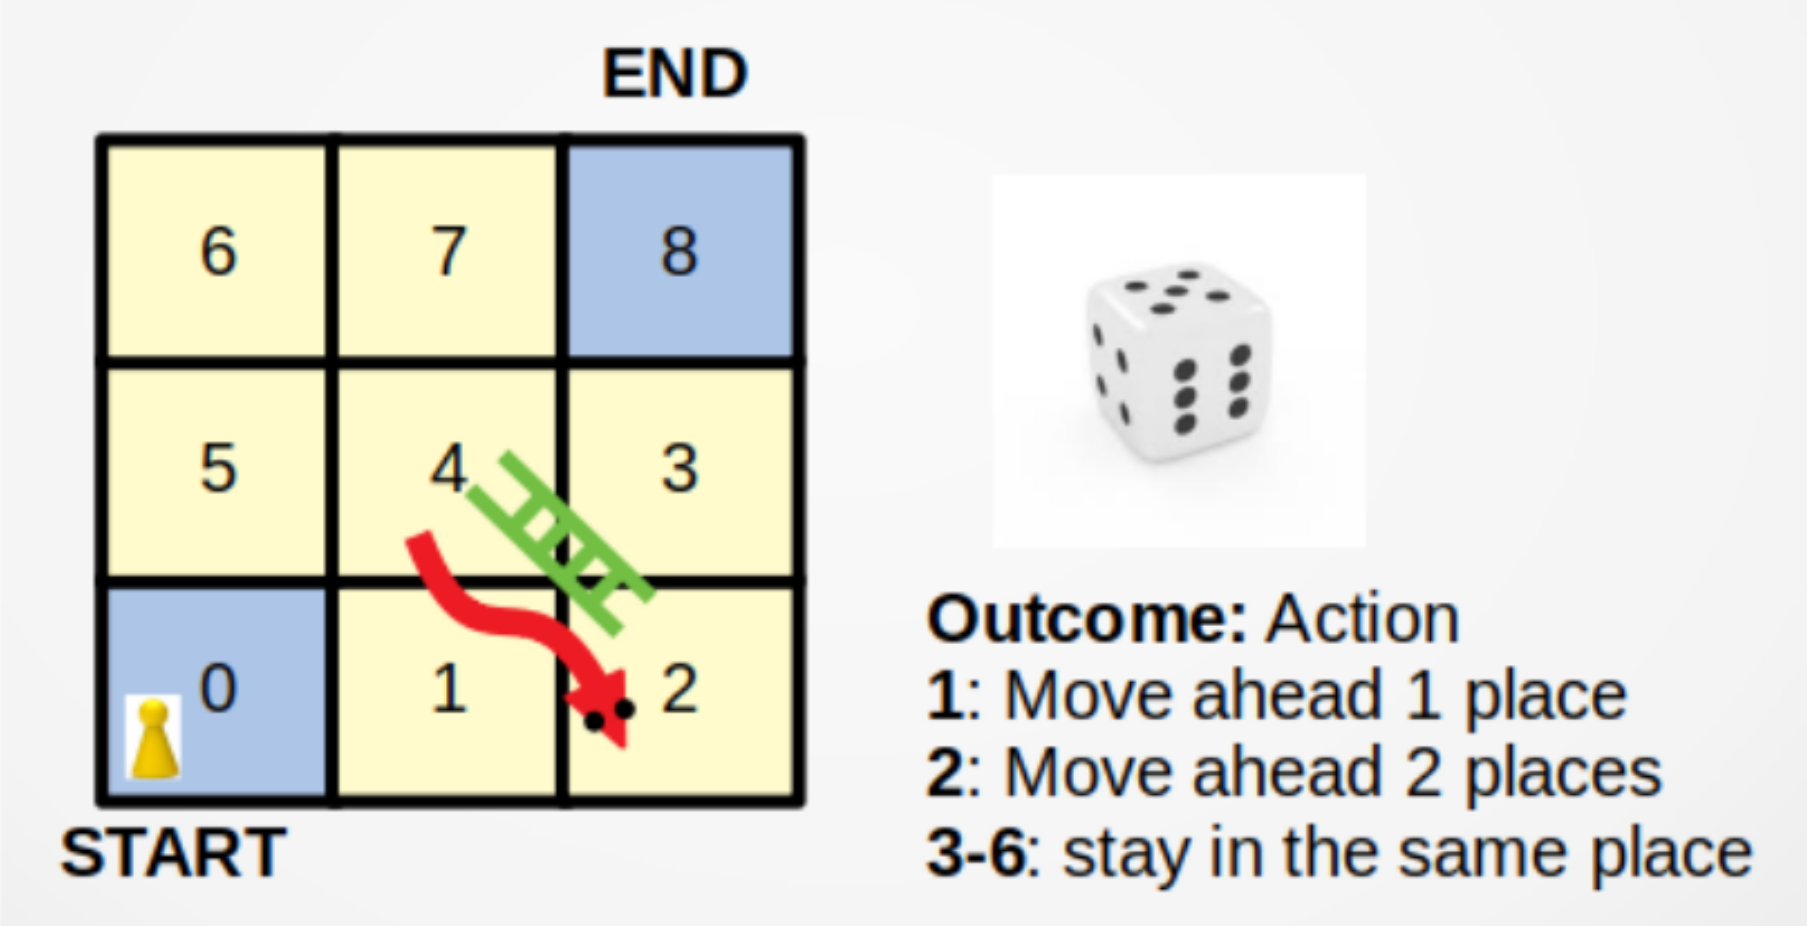

## State Diagram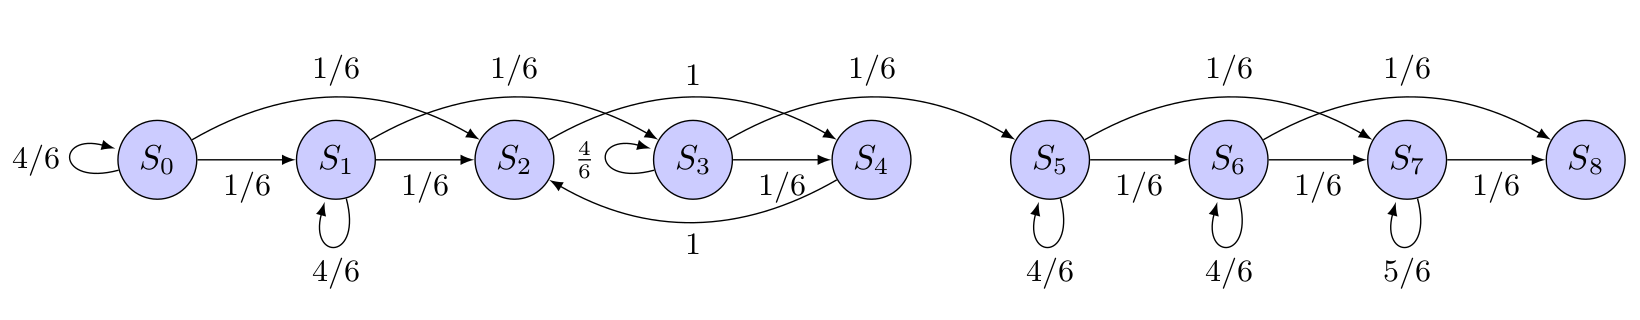

In [ ]:
#Simulating a dice
def dice():
    dice_value = random.randint(1,6)
    return dice_value

'''
Inputs: 1.dice_value: Outcome of die
        2.previous_value: current position of pawn
        3. max_state: Tile at which victory is declared
        
Output: final_value: Updated pawn position
'''
def snake_ladders(dice_value,previous_value,max_state):
    loop=[2,4]
    move_on = [1,2]
    current_value=previous_value
    #print(dice_value)
    if dice_value in move_on:
        current_value = current_value+dice_value
        if current_value>max_state:
            current_value=previous_value
            final_value=current_value
            fail_tag=False
        
        if current_value in loop:
            final_value=0
            fail_tag=True
        else:
            final_value=current_value
            fail_tag=False

    else:
        final_value=previous_value
        fail_tag=False   
    return (final_value,fail_tag)    
    
'''This function takes maximum number a die is rolled and counts number of victories 
from 1 to max number die is rolled 
Inputs: 1. num_of_dice_throw: Maximum number of times a die is rolled
        2. num_of_samples: Number of times game is played
        3. max_state: Tile at which victory is declared
        
Output: win_count: List with index+1 represents victory counts over index+1 die rolls
'''
def game(num_of_dice_throw,num_of_samples,max_state):
    #Game starts at position 0 of board
    position = 0
    count=0
    win_count=np.zeros((num_of_dice_throw,1))
    fail_count=0
    while True:
        count=count+1
        for i in range(num_of_dice_throw):
            dice_value = dice()
            position,fail_tag = snake_ladders(dice_value,position,max_state) 
            if position==8:
                win_count[i] = win_count[i]+1
            if fail_tag:
                break

        if count==num_of_samples:
            break
        position =0
    return win_count        
            
if __name__== "__main__" :
    num_of_dice_throws=10
    simulation_mode =True #Set this for simulation 
    num_of_samples = 100000
    max_state=8
    win_count=game(num_of_dice_throws,num_of_samples,max_state)
    #print(f'The Probabilty of wining with {num_of_dice_throws} dice throws is {win_count/num_of_samples}')
    
    #Simulation
    
    if simulation_mode:
        max_dice_throws = 50
        num_of_games = 100000
        win_count = game(max_dice_throws,num_of_games,max_state)
     
        


[12590.]
[0.1259]


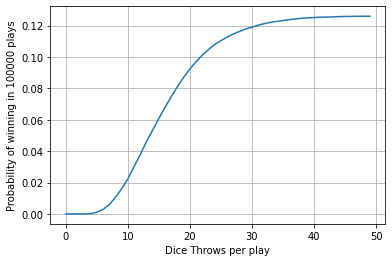

In [ ]:
plt.plot(np.arange(50), win_count/num_of_games)
print(win_count[49])
print(win_count[49]/num_of_games)

plt.xlabel('Dice Throws per play')
plt.ylabel(f'Probability of winning in {num_of_games} plays')
plt.grid()

## Mathematical Representation as Markov Model

Taking states representing tiles on Snake and Ladder game in range 0 to 8, We get the following P matrix where $P_{ij}$ is probability to go from State-i to State-j
\begin{equation}
P=
      \begin{bmatrix}
         \frac{4}{6} & \frac{1}{6} & \frac{1}{6} & 0&0&0&0&0&0\\
         0 & \frac{4}{6} & \frac{1}{6} & \frac{1}{6}&0&0&0&0&0\\
         0&0&0&0 &1 &  0  & 0&0&0 \\
         0&0&0 & \frac{4}{6} & \frac{1}{6} & \frac{1}{6}&0&0&0\\
         0&0&1&0&0&0&0&0&0\\
         0&0&0&0&0&\frac{4}{6}&\frac{1}{6}&\frac{1}{6}&0\\
         0&0&0&0&0&0&\frac{4}{6}&\frac{1}{6}&\frac{1}{6}\\
         0&0&0&0&0&0&0&\frac{5}{6}&\frac{1}{6}\\
         0&0&0&0&0&0&0&0&1
        \end{bmatrix}
\end{equation}


Here we are interested in going from State-0 to State-8 over N transitions, So $S.P^N$ is 
\begin{equation}
S=
  \begin{bmatrix}
     1&0&0&0&0&0&0&0&0
  \end{bmatrix}
\end{equation}  

In [ ]:
#If dice outcomes are 1,2,2,1,2 or 1,2,2,2,1 we will win in 5 transitions so P^5
P = [[4/6,1/6,1/6,0,0,0,0,0,0],
     [0,4/6,1/6,1/6,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0],
     [0,0,0,4/6,1/6,1/6,0,0,0],
     [0,0,1,0,0,0,0,0,0],
     [0,0,0,0,0,4/6,1/6,1/6,0],
     [0,0,0,0,0,0,4/6,1/6,1/6],
     [0,0,0,0,0,0,0,5/6,1/6],
     [0,0,0,0,0,0,0,0,1]]
#p5 = np.linalg.matrix_power(P,5)
#print(np.round(p5,3))
dice = np.arange(2,50,2)
win_prob = np.zeros_like(dice,dtype='float')
for i,j in zip(dice,range(len(dice))):
    win_prob[j]=np.linalg.matrix_power(P,i)[0][8]
       

0.12468493924680187


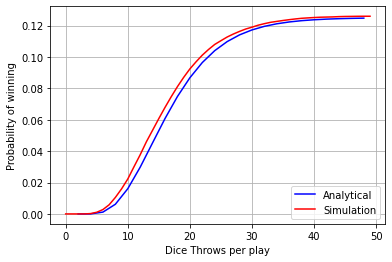

In [ ]:
plt.plot(dice, win_prob,'b',label = 'Analytical')
print(win_prob[23])
plt.plot(np.arange(50), win_count/num_of_games,'r',label='Simulation')

plt.xlabel('Dice Throws per play')
plt.ylabel('Probability of winning')
plt.grid()
plt.legend(loc='lower right',ncol=1)
plt.show()
#print(win_prob)